## Assignment 2
# Written Assignment
<div align="center">
    
$$
\begin{align*}
& x^{\{k\}} \text{ is current training data point.} \\[10pt]
& a^{[1]} = x^{\{k\}} \\[10pt]
& \text{For } l=2 \text{ upto } L \\[10pt]
& \quad z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]} \\[10pt]
& \quad a^{[l]} = \sigma(z^{[l]}) \\[10pt]
& \quad D^{[l]} = \text{diag}(\sigma'(z^{[l]})) \\[10pt]
& \text{end} \\[10pt]
& \text{\# Define } \nabla a^{[L]} = \begin{pmatrix} \dfrac{\partial a^{[L]}}{\partial w_{11}} & \dfrac{\partial a^{[L]}}{\partial w_{21}} & \cdots & \dfrac{\partial a^{[L]}}{\partial w_{n_l 1}} & \dfrac{\partial a^{[L]}}{\partial b} \end{pmatrix}^T \\[10pt]
& \text{For } i=1 \text{ upto } n_{l}-1 \\[10pt]
& \quad a_i = \sigma'(z_i^{[L]})a^{[l-1]} \\[10pt]
& \text{end} \\[10pt]
& a_{n_l} = \sigma'(z_j^{[L]})
\end{align*}
$$
    
</div>

Proof.

First, observe that $\dfrac{\partial a_j^{[l]}}{\partial z_j}=\dfrac{\partial\sigma(z_j^{[L]})}{\partial z_j}=\sigma'(z_j^{[L]})$
$$
\begin{array}{rcl}
\dfrac{\partial a_j^{[L]}}{\partial w_{mn}}&=&\dfrac{\partial a_j}{\partial z_j}\cdot\dfrac{\partial z_j}{\partial w_{mn}}\\[10pt]
&=&\sigma'(z_j^{[L]})\dfrac{\partial}{\partial w_{mn}}\displaystyle\sum_{n=1}^{n_{L-1}}\left(w_{jn}a_n^{[L-1]}+b_j^{[L]}\right)\\[10pt]
&=&\sigma'(z_j^{[L]})a_n^{[L-1]}\\[10pt]
\dfrac{\partial a_j^{[L]}}{\partial b_j}&=&\sigma'(z_j^{[L]})
\end{array}
$$

# Programmong Assignment
Actually, I tried this several times with different functions and layer counts, and I am just showing the result I am most satisfied with.
* \textbf{The program is shown below.}

In [ ]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

jax.config.update("jax_enable_x64", True)

def f(x):
    return 1 / (1 + 25 * x**2)

def sigmoid(x):
    return 1 / (1 + jnp.exp(-x))

key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
x_train = jax.random.uniform(subkey, shape=(1000,), minval=-1.0, maxval=1.0)
y_train = f(x_train)

key, w1_key, b1_key, w2_key, b2_key, w3_key, b3_key = jax.random.split(key, 7)
params = {
    'w1': jax.random.normal(w1_key, (1, 16)), 'b1': jax.random.normal(b1_key, (16,)),
    'w2': jax.random.normal(w2_key, (16, 16)), 'b2': jax.random.normal(b2_key, (16,)),
    'w3': jax.random.normal(w3_key, (16, 1)), 'b3': jax.random.normal(b3_key, (1,))
}

def deep_sigmoid_model(params, x):
    x = x.reshape(-1, 1)
    hidden1 = sigmoid(x @ params['w1'] + params['b1'])
    hidden2 = sigmoid(hidden1 @ params['w2'] + params['b2'])
    output = hidden2 @ params['w3'] + params['b3']
    return output

def loss_fn(params, x, y):
    predictions = deep_sigmoid_model(params, x).squeeze()
    return jnp.mean((predictions - y)**2)

@jax.jit
def update_step(params, x, y, learning_rate):
    grads = jax.grad(loss_fn)(params, x, y)
    return jax.tree_util.tree_map(lambda p, g: p - learning_rate * g, params, grads)

learning_rate = 0.01
epochs = 40000 
loss_history = []

batch_size = 32 
num_train = len(x_train)
steps_per_epoch = num_train // batch_size

for epoch in range(epochs):
    perm = np.random.permutation(num_train)
    
    for step in range(steps_per_epoch):
        batch_idx = perm[step * batch_size : (step + 1) * batch_size]
        x_batch, y_batch = x_train[batch_idx], y_train[batch_idx]
        params = update_step(params, x_batch, y_batch, learning_rate)
    
    if epoch % 1000 == 0:
        loss = loss_fn(params, x_train, y_train)
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

x_plot = jnp.linspace(-1, 1, 500)
y_true = f(x_plot)
y_pred = deep_sigmoid_model(params, x_plot).squeeze()

final_mse = loss_fn(params, x_train, y_train)
print(f"\n--- Final Result ---")
print(f"Final MSE: {final_mse:.6f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_plot, y_true, label='True Runge Function')
plt.plot(x_plot, y_pred, label='Deep Sigmoid NN', linestyle='--')
plt.title('Deep Sigmoid Network Approximation')
plt.legend(); plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(range(0, epochs, 1000), loss_history)
plt.title('Training Loss Curve'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.yscale('log'); plt.grid(True)
plt.tight_layout()
plt.show()

I pick the data randomly at first.
Then, I get the result:
<figure id="Sigmoid 1 Learning rate:0.01 Layer:1 Epoch:20000 Datanum:1000">
    <img src="Sigmoid_0.01_20000_1000.png" alt="Sigmoid 1 Layers Random with more data" style="width: 70%;">
    <figcaption><b>Figure 9</b>: Fourier 1 Learning rate:0.01 Epoch:20000 Datanum:1000.</figcaption>
</figure>
<figure id="fig:sigmoid_approx_3_random">
    <img src="Sigmoid_0.01_40000_1000_3.png" alt="Sigmoid 3 Layers Random" style="width: 70%;">
    <figcaption><b>Figure 1</b>: I use sigmoid function with 3 layers hidden.</figcaption>
</figure>
And I try to modify the way I choose the training data: instead of picking them randomly, I select them uniformly, and I get this figure.
<figure id="fig:sigmoid_approx_3_uniform">
    <img src="Sigmoid_0.01_40000_1000_3_uniform.png" alt="Sigmoid 3 Layers Uniform" style="width: 70%;">
    <figcaption><b>Figure 2</b>: Select the data uniformly.</figcaption>
</figure>
I make this change because if we take the training data from $[-1,1]$ randomly, it might be dense somewhere sparse, which can make our prediction inaccurate in that interval, and we can find that it does help our prediction.

Moreover, I use the last one to take the task: predict the derivative of $f(x)$.
The output and the figure is represented below.

<hr style="border-style: dashed; border-color: white; border-width: 0.8px;">

There are several results with different methods, such as approxinating the Runge function by Polynomials, Trigonometric functions, and decided that whether with 1 hidden layer or more.
<figure id="fig:poly_approx_1_0.01_20000_1000_random">
    <img src="Polynomial_12_0.01_20000_1000.png" alt="Polynomial 1 Layer Random" style="width: 70%;">
    <figcaption><b>Figure 3</b>: Polynomial 1 Epoch:20000 Datanum:1000.</figcaption>
</figure>
<figure id="Polynomial 1 Epoch:20000 Datanum:1000">
    <img src="Polynomial_12_0.01_40000_1000.png" alt="Polynomial 1 Layer Random" style="width: 70%;">
    <figcaption><b>Figure 4</b>: Polynomial 1 Epoch:20000 Datanum:1000.</figcaption>
</figure>
<hr style="border-style: dot; border-color: white; border-width: 0.8px;">

Let's discuss with the case: Approximate the Runge Function by Trigonometric Functions.
1. In the beginning, I just try to use Foirier perspective to solve this problem, and I use the program below.


Epoch 0, Loss: 1.295905
Epoch 1000, Loss: 0.037235
Epoch 2000, Loss: 0.035706
Epoch 3000, Loss: 0.035203
Epoch 4000, Loss: 0.034780
Epoch 5000, Loss: 0.034366
Epoch 6000, Loss: 0.033949
Epoch 7000, Loss: 0.033521
Epoch 8000, Loss: 0.033077
Epoch 9000, Loss: 0.032609
Epoch 10000, Loss: 0.032113
Epoch 11000, Loss: 0.031582
Epoch 12000, Loss: 0.031011
Epoch 13000, Loss: 0.030393
Epoch 14000, Loss: 0.029721
Epoch 15000, Loss: 0.028988
Epoch 16000, Loss: 0.028187
Epoch 17000, Loss: 0.027310
Epoch 18000, Loss: 0.026352
Epoch 19000, Loss: 0.025309

--- Final Result ---
Final MSE: 0.024182
Final Max Error: 0.418474


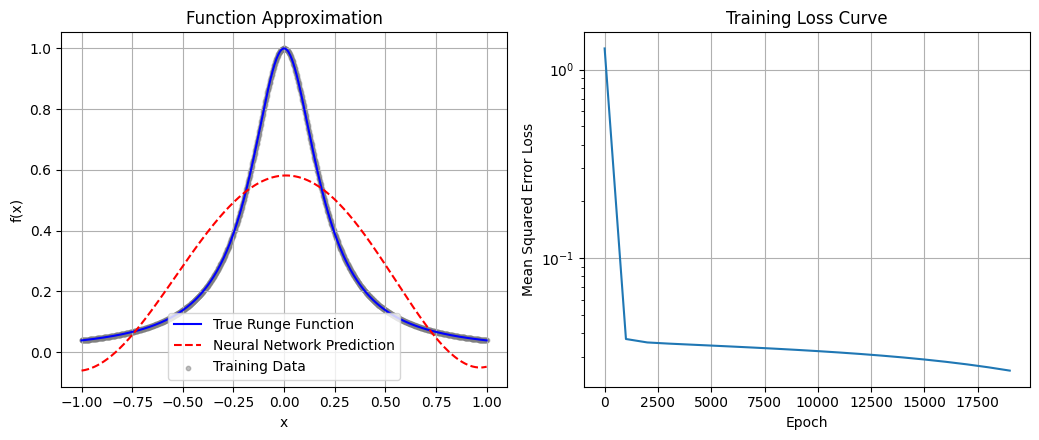

In [14]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
jax.config.update("jax_enable_x64", True)
def f(x):
    return 1/(1+25*x**2)

# Hyperparameters
learning_rate = 0.01
epochs = 20000
datanum = 1001

key=jax.random.PRNGKey(0)
function_value=[]

x_train = jnp.linspace(-1.0, 1.0, datanum)
y_train = f(x_train)
def model(params, x):
    x = x.reshape(-1, 1)
    hidden = jnp.concatenate([jnp.sin(x @ params['w1']), jnp.cos(x @ params['w1'])], axis=1)
    return hidden @ params['w2'] + params['b']

key, w1_key, w2_key, b_key = jax.random.split(key, 4)
params = {
    'w1': jax.random.normal(w1_key, (1, 16)), 
    'w2': jax.random.normal(w2_key, (32, 1)), 
    'b': jax.random.normal(b_key, (1,))
}

def loss_fn(params, x, y):
    predictions = model(params, x).squeeze() 
    return jnp.mean((predictions - y)**2)

@jax.jit
def update_step(params, x, y, learning_rate):
    grads = jax.grad(loss_fn)(params, x, y)
    return jax.tree.map(lambda p, g: p - learning_rate * g, params, grads)


loss_history = []

for epoch in range(epochs):
    params = update_step(params, x_train, y_train, learning_rate)
    
    if epoch % 1000 == 0:
        loss = loss_fn(params, x_train, y_train)
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.6f}")
        
x_plot = jnp.linspace(-1, 1, 500)
y_true = f(x_plot)
y_pred = model(params, x_plot).squeeze()

final_mse = jnp.mean((model(params, x_train).squeeze() - y_train)**2)

max_error = jnp.max(jnp.abs(model(params, x_train).squeeze() - y_train))

print("\n--- Final Result ---")
print(f"Final MSE: {final_mse:.6f}")
print(f"Final Max Error: {max_error:.6f}")

plt.figure(figsize=(10.5, 4.5))

plt.subplot(1, 2, 1)
plt.plot(x_plot, y_true, label='True Runge Function', color='blue')
plt.plot(x_plot, y_pred, label='Neural Network Prediction', color='red', linestyle='--')
plt.scatter(x_train, y_train, s=10, color='gray', alpha=0.5, label='Training Data')
plt.title('Function Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(0, epochs, 1000), loss_history)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.yscale('log') 
plt.grid(True)

plt.tight_layout()
plt.show()

```text
--- Final Result ---
Final MSE: 0.032230
Final Max Error: 0.462384
```
<figure id="Fourier Learning rate:0.01 Layer:1 Epoch:20000 Datanum:1001">
    <img src="Fourier_0.01_20000_1001.png" alt="Fourier 1 Layer Random" style="width: 70%;">
    <figcaption><b>Figure 5</b>: Fourier Learning rate:0.01 Layer:1 Epoch:20000 Datanum:1001.</figcaption>
</figure>

```text
--- Final Result ---
Final MSE: 0.008604
Final Max Error: 0.278259
```

<figure id="Fourier Learning rate:0.0001 Layer:2 Epoch:20000 Datanum:10001">
    <img src="Fourier_0.0001_20000_10001_2.png" alt="Fourier 2 Layers Random" style="width: 70%;">
    <figcaption><b>Figure 6</b>: Fourier Learning rate:0.0001 Layer:2 Epoch:20000 Datanum:10001.</figcaption>
</figure>

```text
--- Final Result ---
Final MSE: 0.004506
Final Max Error: 0.216450
```

<figure id="Fourier Learning rate:0.0001 Layer:3 Epoch:20000 Datanum:10001">
    <img src="Fourier_0.0001_20000_10001_3.png" alt="Fourier 3 Layers Random" style="width: 70%;">
    <figcaption><b>Figure 7</b>: Fourier Learning rate:0.0001 Layer:3 Epoch:20000 Datanum:10001.</figcaption>
</figure>

```text
The results above oscillates severely in the both sides, and the middle part almost match the shape of the target.
--- Final Result ---
Final MSE: 0.000017
Final Max Error: 0.019488
```

<figure id="Fourier Learning rate:0.0001 Layer:2 Epoch:20000 Datanum:100001">
    <img src="Fourier_0.0001_20000_100001_3.png" alt="Fourier 3 Layers Random with huge data" style="width: 70%;">
    <figcaption><b>Figure 8</b>: Fourier Learning rate:0.0001 Layer:2 Epoch:20000 Datanum:100001.</figcaption>
</figure>

<hr style="border-style: dot; border-color: white; border-width: 0.8px;">

